#Basic data Preprocessing and feature extraction

In [ ]:
from typing import Iterable, List, Dict, Callable
import os
import gc

In [ ]:
!pip install sklearn_relief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis
from scipy.stats import skew
import sklearn_relief as relief
from sklearn.metrics import accuracy_score

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download jjacostupa/condition-monitoring-of-hydraulic-systems

 89% 81.0M/91.1M [00:01<00:00, 75.5MB/s]
100% 91.1M/91.1M [00:01<00:00, 48.1MB/s]


In [ ]:
! unzip condition-monitoring-of-hydraulic-systems

Archive:  condition-monitoring-of-hydraulic-systems.zip
  inflating: CE.txt                  
  inflating: CP.txt                  
  inflating: EPS1.txt                
  inflating: FS1.txt                 
  inflating: FS2.txt                 
  inflating: PS1.txt                 
  inflating: PS2.txt                 
  inflating: PS3.txt                 
  inflating: PS4.txt                 
  inflating: PS5.txt                 
  inflating: PS6.txt                 
  inflating: SE.txt                  
  inflating: TS1.txt                 
  inflating: TS2.txt                 
  inflating: TS3.txt                 
  inflating: TS4.txt                 
  inflating: VS1.txt                 
  inflating: description.txt         
  inflating: documentation.txt       
  inflating: profile.txt             


In [ ]:
ps1 = pd.read_csv('PS1.txt',delim_whitespace = True,header = None)
ps2 = pd.read_csv('PS2.txt',delim_whitespace = True,header = None)
ps3 = pd.read_csv('PS3.txt',delim_whitespace = True,header = None)
ps4 = pd.read_csv('PS3.txt',delim_whitespace = True,header = None)
ps5 = pd.read_csv('PS5.txt',delim_whitespace = True,header = None)
ps6 = pd.read_csv('PS6.txt',delim_whitespace = True,header = None)

In [ ]:
target = pd.read_csv("profile.txt",delim_whitespace = True,header = None)

In [ ]:
TARGET_VALUES_MAP = {
    "cooler": {
        3: "close to total failure",
        20: "reduced effifiency",
        100: "full efficiency",
    },
    "valve": {
        100:"optimal switching behavior",
        90: "small lag",
        80: "severe lag",
        73: "close to total failure",
    }, 
    "leakage": {
        0: "no",
	    1: "weak",
	    2: "severe",
    },
    "accumulator": {
        130: "optimal pressure",
    	115: "slightly reduced pressure",
	    100: "severely reduced pressure",
	    90:  "close to total failure",
     },
     "stable":{
        0: "yes",
	    1: "not",
     }
}

In [ ]:
target.head()

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [ ]:
ps1_new = ps1.mean(axis = 1)
ps2_new = ps2.mean(axis = 1)
ps3_new = ps3.mean(axis = 1)
ps4_new = ps4.mean(axis = 1)
ps5_new = ps5.mean(axis = 1)
ps6_new = ps6.mean(axis = 1)

In [ ]:
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
     
    #Calculate square
    for i in range(0,n):
        square += (arr[i]**2)
     
    #Calculate Mean
    mean = (square / (float)(n))
     
    #Calculate Root
    root = math.sqrt(mean)
     
    return root

In [ ]:
rms_list=[]
std_list=[]
kurtosis_list=[]
skew_list=[]
for i in range(0,2205):
   df_new=ps1.iloc[i]
   temp_list=df_new.values.tolist();
   arr=df_new.to_numpy()
   rms_list.append(rmsValue(temp_list,len(temp_list)))
   std_list.append(statistics.pstdev(temp_list))
   kurtosis_list.append(kurtosis(arr))
   skew_list.append(skew(arr,axis=0,bias=True))

In [ ]:
rms_list2=[]
std_list2=[]
kurtosis_list2=[]
skew_list2=[]
for i in range(0,2205):
   df_new=ps2.iloc[i]
   temp_list=df_new.values.tolist();
   arr=df_new.to_numpy()
   rms_list2.append(rmsValue(temp_list,len(temp_list)))
   std_list2.append(statistics.pstdev(temp_list))
   kurtosis_list2.append(kurtosis(arr))
   skew_list2.append(skew(arr,axis=0,bias=True))

In [ ]:
rms_list3=[]
std_list3=[]
kurtosis_list3=[]
skew_list3=[]
for i in range(0,2205):
   df_new=ps3.iloc[i]
   temp_list=df_new.values.tolist();
   arr=df_new.to_numpy()
   rms_list3.append(rmsValue(temp_list,len(temp_list)))
   std_list3.append(statistics.pstdev(temp_list))
   kurtosis_list3.append(kurtosis(arr))
   skew_list3.append(skew(arr,axis=0,bias=True))

In [ ]:
rms_list4=[]
std_list4=[]
kurtosis_list4=[]
skew_list4=[]
for i in range(0,2205):
   df_new=ps4.iloc[i]
   temp_list=df_new.values.tolist();
   arr=df_new.to_numpy()
   rms_list4.append(rmsValue(temp_list,len(temp_list)))
   std_list4.append(statistics.pstdev(temp_list))
   kurtosis_list4.append(kurtosis(arr))
   skew_list4.append(skew(arr,axis=0,bias=True))

In [ ]:
rms_list5=[]
std_list5=[]
kurtosis_list5=[]
skew_list5=[]
for i in range(0,2205):
   df_new=ps5.iloc[i]
   temp_list=df_new.values.tolist();
   arr=df_new.to_numpy()
   rms_list5.append(rmsValue(temp_list,len(temp_list)))
   std_list5.append(statistics.pstdev(temp_list))
   kurtosis_list5.append(kurtosis(arr))
   skew_list5.append(skew(arr,axis=0,bias=True))

In [ ]:
rms_list6=[]
std_list6=[]
kurtosis_list6=[]
skew_list6=[]
for i in range(0,2205):
   df_new=ps6.iloc[i]
   temp_list=df_new.values.tolist();
   arr=df_new.to_numpy()
   rms_list6.append(rmsValue(temp_list,len(temp_list)))
   std_list6.append(statistics.pstdev(temp_list))
   kurtosis_list6.append(kurtosis(arr))
   skew_list6.append(skew(arr,axis=0,bias=True))

In [ ]:
data1=pd.DataFrame(rms_list)
data1.rename(columns={'0':'RMS'},inplace=True)
data2=pd.DataFrame(std_list)
data2.rename(columns={'0':'STD'},inplace=True)
data3=pd.DataFrame(kurtosis_list)
data3.rename(columns={'0':'Kurtosis'},inplace=True)
data4=pd.DataFrame(skew_list)
data4.rename(columns={'0':'Skew'},inplace=True)
df_ps1=pd.concat([ps1_new,data1,data2,data3,data4],axis=1)

In [ ]:
df_ps1.columns=['Mean','RMS','STD','Kurtosis','Skew']

In [ ]:
df_ps1.head()

,Mean,RMS,STD,Kurtosis,Skew
0,160.673492,161.276914,13.938147,0.495566,1.273048
1,160.603320,161.222636,14.117791,0.460174,1.278690
2,160.347720,160.974495,14.191436,0.464134,1.282851
3,160.188088,160.818594,14.226617,0.470640,1.286353
4,160.000472,160.636028,14.275244,0.481844,1.292315


In [ ]:
data1=pd.DataFrame(rms_list2)
data2=pd.DataFrame(std_list2)
data3=pd.DataFrame(kurtosis_list2)
data4=pd.DataFrame(skew_list2)
df_ps2=pd.concat([ps2_new,data1,data2,data3,data4],axis=1)

In [ ]:
df_ps2.columns=['Mean','RMS','STD','Kurtosis','Skew']

In [ ]:
df_ps2.head()

,Mean,RMS,STD,Kurtosis,Skew
0,109.466914,119.173873,47.110581,1.508854,-1.837853
1,109.354890,119.043743,47.041690,1.511086,-1.838351
2,109.158845,118.842497,46.988144,1.508480,-1.837545
3,109.064807,118.748280,46.968307,1.507613,-1.837120
4,108.931434,118.587317,46.871040,1.509724,-1.837496


In [ ]:
data1=pd.DataFrame(rms_list3)
data2=pd.DataFrame(std_list3)
data3=pd.DataFrame(kurtosis_list3)
data4=pd.DataFrame(skew_list3)
df_ps3=pd.concat([ps3_new,data1,data2,data3,data4],axis=1)
df_ps3.columns=['Mean','RMS','STD','Kurtosis','Skew']

In [ ]:
df_ps3.head()

,Mean,RMS,STD,Kurtosis,Skew
0,1.991475,2.204582,0.945626,6.522166,-0.373579
1,1.976234,2.189214,0.941889,6.949745,-0.312814
2,1.972224,2.186255,0.943422,8.213202,-0.196023
3,1.946575,2.159684,0.935456,7.883349,-0.166201
4,1.922707,2.135927,0.930258,9.731260,0.017992


In [ ]:
data1=pd.DataFrame(rms_list4)
data2=pd.DataFrame(std_list4)
data3=pd.DataFrame(kurtosis_list4)
data4=pd.DataFrame(skew_list4)
df_ps4=pd.concat([ps4_new,data1,data2,data3,data4],axis=1)
df_ps4.columns=['Mean','RMS','STD','Kurtosis','Skew']

In [ ]:
df_ps4.tail()

,Mean,RMS,STD,Kurtosis,Skew
2200,2.001438,2.207570,0.931457,5.331948,-0.668354
2201,1.998781,2.204918,0.930880,5.441931,-0.654306
2202,1.993436,2.199435,0.929368,5.745223,-0.612730
2203,2.007077,2.213453,0.933282,5.315250,-0.677827
2204,2.002690,2.209257,0.932764,5.375500,-0.659134


In [ ]:
data1=pd.DataFrame(rms_list5)
data2=pd.DataFrame(std_list5)
data3=pd.DataFrame(kurtosis_list5)
data4=pd.DataFrame(skew_list5)
df_ps5=pd.concat([ps5_new,data1,data2,data3,data4],axis=1)
df_ps5.columns=['Mean','RMS','STD','Kurtosis','Skew']

In [ ]:
df_ps5.head()

,Mean,RMS,STD,Kurtosis,Skew
0,9.842170,9.842564,0.088147,-1.268228,-0.001178
1,9.635142,9.635219,0.038389,-0.564014,0.289772
2,9.530548,9.530615,0.035814,-0.493298,0.186889
3,9.438827,9.438899,0.037065,-0.658430,0.162456
4,9.358762,9.358809,0.029777,-0.474898,0.244247


In [ ]:
data1=pd.DataFrame(rms_list6)
data2=pd.DataFrame(std_list6)
data3=pd.DataFrame(kurtosis_list6)
data4=pd.DataFrame(skew_list6)
df_ps6=pd.concat([ps6_new,data1,data2,data3,data4],axis=1)
df_ps6.columns=['Mean','RMS','STD','Kurtosis','Skew']

In [ ]:
df_ps6.head()

,Mean,RMS,STD,Kurtosis,Skew
0,9.728097,9.728472,0.085359,-1.285051,-0.066643
1,9.529488,9.529557,0.036313,-0.515116,0.236280
2,9.427949,9.428018,0.036028,-0.507092,0.185500
3,9.337430,9.337504,0.037372,-0.668805,0.160194
4,9.260636,9.260680,0.028590,-0.459002,0.205203


#Finding important features with Relieff

In [ ]:
df_ps1['performance'] =target[0]

In [ ]:
df_ps1.head()

,Mean,RMS,STD,Kurtosis,Skew,performance
0,160.673492,161.276914,13.938147,0.495566,1.273048,3
1,160.603320,161.222636,14.117791,0.460174,1.278690,3
2,160.347720,160.974495,14.191436,0.464134,1.282851,3
3,160.188088,160.818594,14.226617,0.470640,1.286353,3
4,160.000472,160.636028,14.275244,0.481844,1.292315,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_ps1['performance']=enc.fit_transform(df_ps1['performance'])

In [ ]:
y=df_ps1['performance']
x=df_ps1.drop("performance",axis='columns')

In [ ]:
X_arr=x.to_numpy()
y_arr=y.to_numpy()

In [ ]:
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)

In [ ]:
print(r.w_)

[1.49025357 1.57017809 0.92786267 0.25778873 0.24063093]


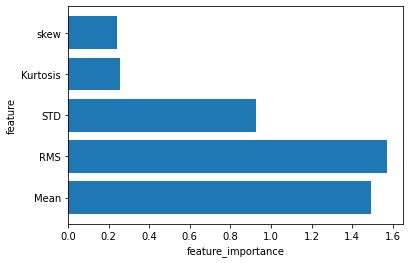

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps2['performance'] =target[0]
enc=LabelEncoder()
df_ps2['performance']=enc.fit_transform(df_ps2['performance'])
y=df_ps2['performance']
x=df_ps2.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[1.66185557 1.95971044 1.3564887  0.16511329 0.06889048]


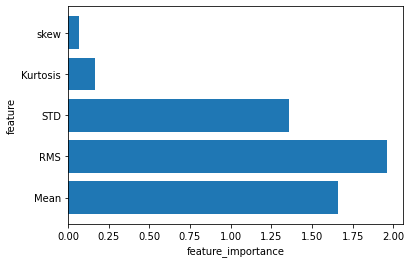

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps3['performance'] =target[0]
enc=LabelEncoder()
df_ps3['performance']=enc.fit_transform(df_ps3['performance'])
y=df_ps3['performance']
x=df_ps3.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.07671137 0.06844094 0.02315031 0.91114367 0.27215361]


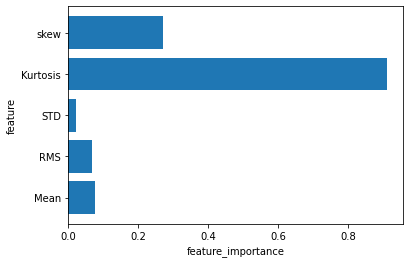

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps4['performance'] =target[0]
enc=LabelEncoder()
df_ps4['performance']=enc.fit_transform(df_ps4['performance'])
y=df_ps4['performance']
x=df_ps4.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[1.13294872 0.89012892 0.64990659 5.59067257 0.26197276]


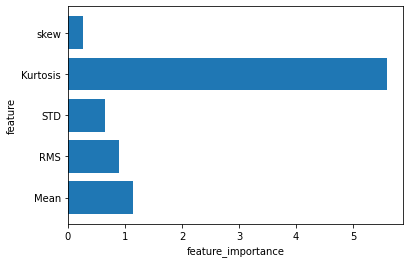

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps5['performance'] =target[0]
enc=LabelEncoder()
df_ps5['performance']=enc.fit_transform(df_ps5['performance'])
y=df_ps5['performance']
x=df_ps5.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.03697827 0.03691342 0.02273366 0.30143992 0.0516907 ]


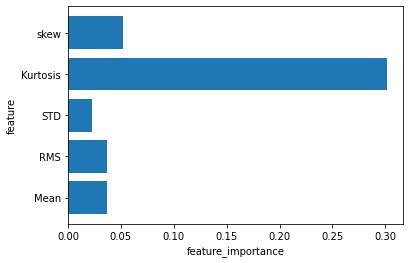

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps6['performance'] =target[0]
enc=LabelEncoder()
df_ps6['performance']=enc.fit_transform(df_ps6['performance'])
y=df_ps6['performance']
x=df_ps6.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.04643727 0.04639203 0.02377657 0.29851194 0.04918386]


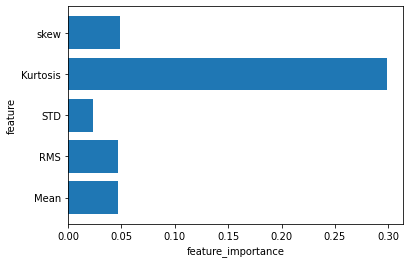

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

#cooler Performance prediction with Gradient Boosted Decision tree classifier

In [ ]:
df_final=pd.DataFrame()
df_final['PS1_f']=df_ps1['RMS']
df_final['PS2_f']=df_ps2['RMS']
df_final['PS3_f']=df_ps3['Kurtosis']
df_final['PS4_f']=df_ps4['Kurtosis']
df_final['PS5_f']=df_ps5['Kurtosis']
df_final['PS6_f']=df_ps6['Kurtosis']
df_final['performance']=target[0]

In [ ]:
enc=LabelEncoder()
df_final['performance']=enc.fit_transform(df_final['performance'])

In [ ]:
df_final.head()

,PS1_f,PS2_f,PS3_f,PS4_f,PS5_f,PS6_f,performance
0,161.276914,119.173873,6.522166,-3.0,-1.268228,-1.285051,3
1,161.222636,119.043743,6.949745,-3.0,-0.564014,-0.515116,3
2,160.974495,118.842497,8.213202,-3.0,-0.493298,-0.507092,3
3,160.818594,118.748280,7.883349,-3.0,-0.658430,-0.668805,3
4,160.636028,118.587317,9.731260,-3.0,-0.474898,-0.459002,3


In [ ]:
#performing train test split 80:20
y=df_final['performance']
del df_final['performance']
x=df_final
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Text(0, 0.5, 'Frequency')

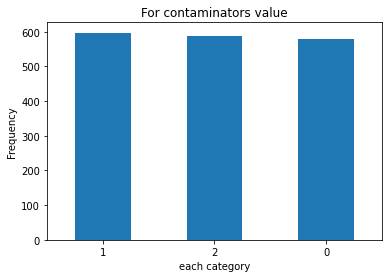

In [ ]:
#Checking whether data is balanced or not
risk_flag_sum=pd.value_counts(y_train,sort=True)
risk_flag_sum.plot(kind='bar',rot=0)
plt.title('For contaminators value')

plt.xlabel('each category')
plt.ylabel('Frequency')
#We can observe data is imbalanced from below figure

In [ ]:
#Now we are using Synthetic Minority OverSampling Technique(SMOTE) on Training data
#We use SMOTE to overcome Class Imbalance
from collections import Counter
from imblearn.combine import SMOTETomek
counter=Counter(y_train)
print('before',counter)
smtom=SMOTETomek()
X,Y=smtom.fit_resample(X_train,y_train)
counter=Counter(Y)
print('after',counter)

before Counter({1: 597, 2: 587, 0: 580})
after Counter({2: 591, 0: 582, 1: 580})


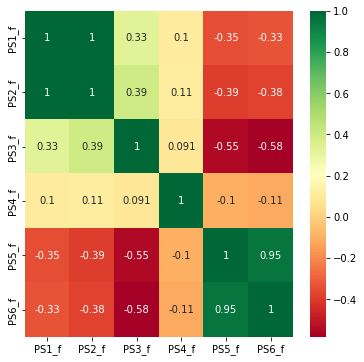

In [ ]:
#We use correlation matrix to observe relations among different features
corrmat=df_final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))
c=sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
random_grid={'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.15],'n_estimators':[50,100,200,250],'max_features':[1,3,5,7],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_depth':[1,3,5,7,10,30]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
classifier_random=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=100,n_jobs=-1,cv=5,verbose=3)
classifier_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tr

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.15],
                                        'max_depth': [1, 3, 5, 7, 10, 30],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 250]},
                   verbose=3)

In [ ]:
classifier_random.best_estimator_

GradientBoostingClassifier(learning_rate=0.005, max_depth=10, max_features=5,
                           min_samples_leaf=2, min_samples_split=5)

In [ ]:
#classifier=GradientBoostingClassifier(learning_rate=0.15, max_depth=10, max_features=3,min_samples_leaf=2, min_samples_split=5,n_estimators=250)
GradientBoostingClassifier(learning_rate=0.005, max_depth=10, max_features=5,
                           min_samples_leaf=2, min_samples_split=5)
classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_testpred=classifier.predict(X_test)
df_testpred=y_testpred
df_testpred=df_testpred.reshape(-1,1)

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testpred)

0.9931972789115646

In [ ]:
confusion_matrix(y_test, y_testpred)

array([[151,   1,   0],
       [  0, 135,   0],
       [  2,   0, 152]])

#Important feature extraction to check valve switching

In [ ]:
df_ps1['performance'] =target[1]
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_ps1['performance']=enc.fit_transform(df_ps1['performance'])
y=df_ps1['performance']
x=df_ps1.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)

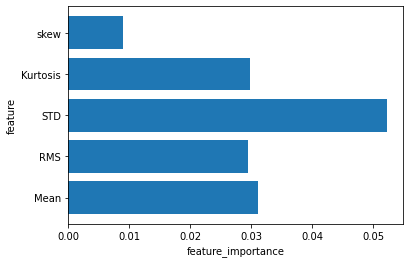

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps2['performance'] =target[1]
enc=LabelEncoder()
df_ps2['performance']=enc.fit_transform(df_ps2['performance'])
y=df_ps2['performance']
x=df_ps2.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.10124558 0.06449966 0.17781289 0.04574097 0.01216573]


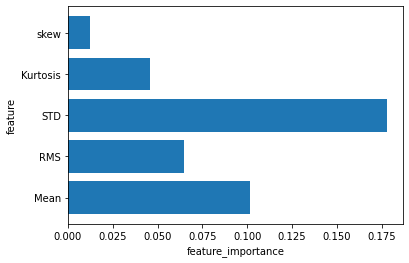

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps3['performance'] =target[1]
enc=LabelEncoder()
df_ps3['performance']=enc.fit_transform(df_ps3['performance'])
y=df_ps3['performance']
x=df_ps3.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.01200164 0.01229446 0.00634938 0.03590286 0.02733864]


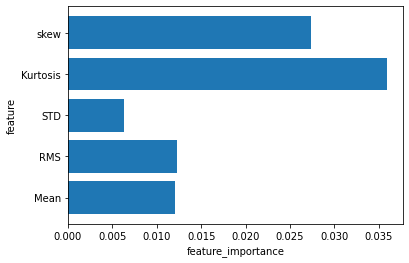

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps4['performance'] =target[1]
enc=LabelEncoder()
df_ps4['performance']=enc.fit_transform(df_ps4['performance'])
y=df_ps4['performance']
x=df_ps4.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.15783603 0.15190287 0.05950797 2.78705042 0.2271259 ]


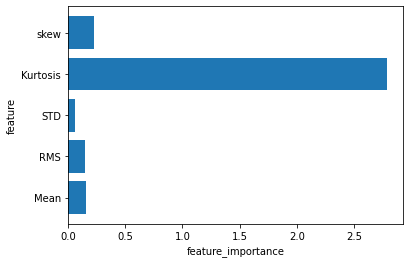

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps5['performance'] =target[1]
enc=LabelEncoder()
df_ps5['performance']=enc.fit_transform(df_ps5['performance'])
y=df_ps5['performance']
x=df_ps5.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.01656163 0.01656209 0.00046563 0.01143021 0.00972469]


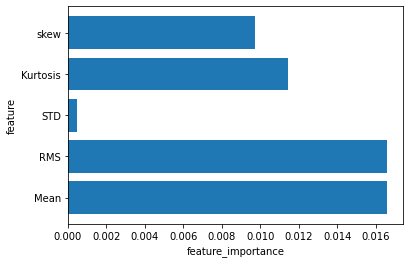

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps6['performance'] =target[1]
enc=LabelEncoder()
df_ps6['performance']=enc.fit_transform(df_ps6['performance'])
y=df_ps6['performance']
x=df_ps6.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.01685293 0.01685267 0.00041424 0.01178461 0.00978457]


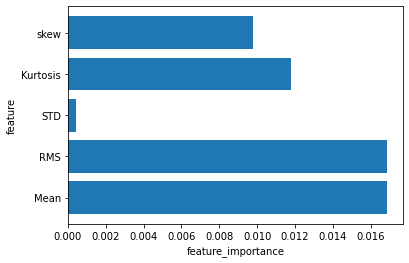

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

#Checking  with GBDTC

In [ ]:
df_final=pd.DataFrame()
df_final['PS1_f']=df_ps1['STD']
df_final['PS2_f']=df_ps2['STD']
df_final['PS3_f']=df_ps3['Kurtosis']
df_final['PS4_f']=df_ps4['Kurtosis']
df_final['PS5_f']=df_ps5['RMS']
df_final['PS6_f']=df_ps6['Mean']
df_final['performance']=target[1]

In [ ]:
enc=LabelEncoder()
df_final['performance']=enc.fit_transform(df_final['performance'])

In [ ]:
#performing train test split 80:20
y=df_final['performance']
del df_final['performance']
x=df_final
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Text(0, 0.5, 'Frequency')

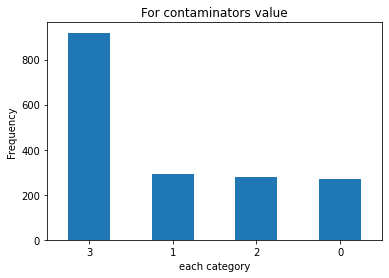

In [ ]:
#Checking whether data is balanced or not
risk_flag_sum=pd.value_counts(y_train,sort=True)
risk_flag_sum.plot(kind='bar',rot=0)
plt.title('For contaminators value')

plt.xlabel('each category')
plt.ylabel('Frequency')
#We can observe data is imbalanced from below figure

In [ ]:
#Now we are using Synthetic Minority OverSampling Technique(SMOTE) on Training data
#We use SMOTE to overcome Class Imbalance
from collections import Counter
from imblearn.combine import SMOTETomek
counter=Counter(y_train)
print('before',counter)
smtom=SMOTETomek()
X,Y=smtom.fit_resample(X_train,y_train)
counter=Counter(Y)
print('after',counter)

before Counter({3: 919, 1: 293, 2: 280, 0: 272})
after Counter({0: 885, 1: 883, 3: 880, 2: 876})


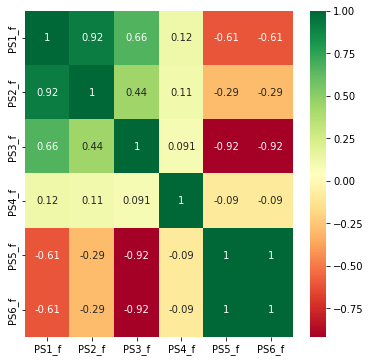

In [ ]:
#We use correlation matrix to observe relations among different features
corrmat=df_final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))
c=sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
random_grid={'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.15],'n_estimators':[50,100,200,250],'max_features':[1,3,5,7],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_depth':[1,3,5,7,10,30]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
classifier_random=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=100,n_jobs=-1,cv=5,verbose=3)
classifier_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tr

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.15],
                                        'max_depth': [1, 3, 5, 7, 10, 30],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 250]},
                   verbose=3)

In [ ]:
classifier_random.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=30, max_features=3,
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=250)

In [ ]:
classifier=GradientBoostingClassifier(learning_rate=0.05, max_depth=30, max_features=3,
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=250)
classifier.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=30, max_features=3,
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=250)

In [ ]:
y_testpred=classifier.predict(X_test)
df_testpred=y_testpred
df_testpred=df_testpred.reshape(-1,1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testpred)

0.9773242630385488

#Important features for checking leakage

In [ ]:
df_ps1['performance'] =target[2]
enc=LabelEncoder()
df_ps1['performance']=enc.fit_transform(df_ps1['performance'])
y=df_ps1['performance']
x=df_ps1.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)

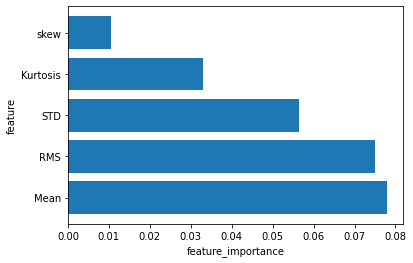

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps2['performance'] =target[2]
enc=LabelEncoder()
df_ps2['performance']=enc.fit_transform(df_ps2['performance'])
y=df_ps2['performance']
x=df_ps2.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.08881817 0.10239964 0.06914432 0.00831014 0.00270303]


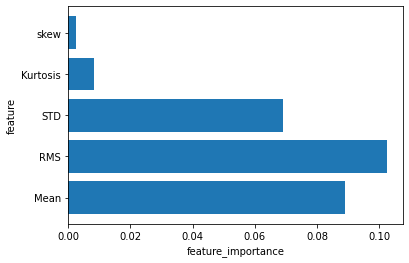

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps3['performance'] =target[2]
enc=LabelEncoder()
df_ps3['performance']=enc.fit_transform(df_ps3['performance'])
y=df_ps3['performance']
x=df_ps3.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.03261471 0.03560583 0.01515652 0.0373841  0.02962127]


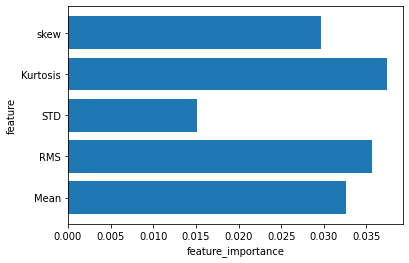

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps4['performance'] =target[2]
enc=LabelEncoder()
df_ps4['performance']=enc.fit_transform(df_ps4['performance'])
y=df_ps4['performance']
x=df_ps4.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.06448686 0.0813575  0.09768237 3.81657021 0.17699284]


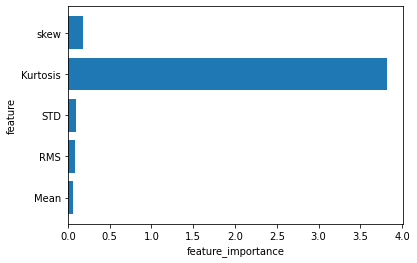

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps5['performance'] =target[2]
enc=LabelEncoder()
df_ps5['performance']=enc.fit_transform(df_ps5['performance'])
y=df_ps5['performance']
x=df_ps5.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.02065823 0.02065842 0.00037161 0.01349386 0.01158456]


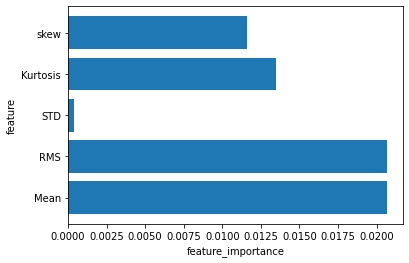

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps6['performance'] =target[2]
enc=LabelEncoder()
df_ps6['performance']=enc.fit_transform(df_ps6['performance'])
y=df_ps6['performance']
x=df_ps6.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.01416176 0.01416206 0.00034413 0.01195622 0.01553159]


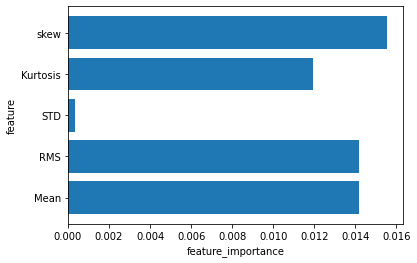

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

#Leakage check with GBDTC

In [ ]:
df_final=pd.DataFrame()
df_final['PS1_f']=df_ps1['Mean']
df_final['PS2_f']=df_ps2['RMS']
df_final['PS3_f']=df_ps3['Kurtosis']
df_final['PS4_f']=df_ps4['Kurtosis']
df_final['PS5_f']=df_ps5['RMS']
df_final['PS6_f']=df_ps6['Skew']
df_final['performance']=target[2]

In [ ]:
enc=LabelEncoder()
df_final['performance']=enc.fit_transform(df_final['performance'])

In [ ]:
#performing train test split 80:20
y=df_final['performance']
del df_final['performance']
x=df_final
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Text(0, 0.5, 'Frequency')

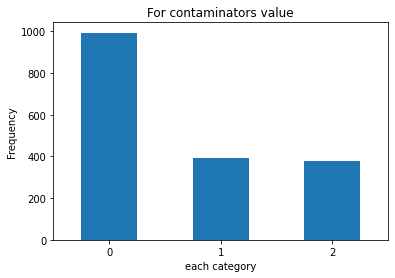

In [ ]:
#Checking whether data is balanced or not
risk_flag_sum=pd.value_counts(y_train,sort=True)
risk_flag_sum.plot(kind='bar',rot=0)
plt.title('For contaminators value')

plt.xlabel('each category')
plt.ylabel('Frequency')
#We can observe data is imbalanced from below figure

In [ ]:
#Now we are using Synthetic Minority OverSampling Technique(SMOTE) on Training data
#We use SMOTE to overcome Class Imbalance
from collections import Counter
from imblearn.combine import SMOTETomek
counter=Counter(y_train)
print('before',counter)
smtom=SMOTETomek()
X,Y=smtom.fit_resample(X_train,y_train)
counter=Counter(Y)
print('after',counter)

before Counter({0: 993, 1: 391, 2: 380})
after Counter({0: 975, 1: 966, 2: 958})


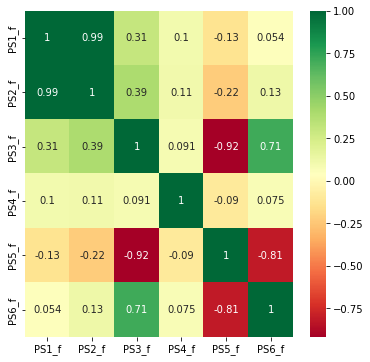

In [ ]:
#We use correlation matrix to observe relations among different features
corrmat=df_final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))
c=sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
random_grid={'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.15],'n_estimators':[50,100,200,250],'max_features':[1,3,5,7],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_depth':[1,3,5,7,10,30]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
classifier_random=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=100,n_jobs=-1,cv=5,verbose=3)
classifier_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tr

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.15],
                                        'max_depth': [1, 3, 5, 7, 10, 30],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 250]},
                   verbose=3)

In [ ]:
classifier_random.best_estimator_

GradientBoostingClassifier(max_depth=10, max_features=3, min_samples_split=10)

In [ ]:
classifier=GradientBoostingClassifier(max_depth=10, max_features=3, min_samples_split=10)
classifier.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, max_features=3, min_samples_split=10)

In [ ]:
y_testpred=classifier.predict(X_test)
df_testpred=y_testpred
df_testpred=df_testpred.reshape(-1,1)
accuracy_score(y_test, y_testpred)

0.9841269841269841

#Important features for accumulator pressure

In [ ]:
df_ps1['performance'] =target[3]
enc=LabelEncoder()
df_ps1['performance']=enc.fit_transform(df_ps1['performance'])
y=df_ps1['performance']
x=df_ps1.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)

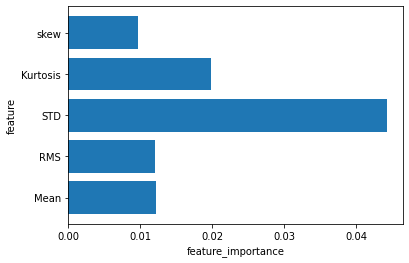

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps2['performance'] =target[3]
enc=LabelEncoder()
df_ps2['performance']=enc.fit_transform(df_ps2['performance'])
y=df_ps2['performance']
x=df_ps2.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.01965751 0.01966567 0.01534229 0.0023469  0.00099496]


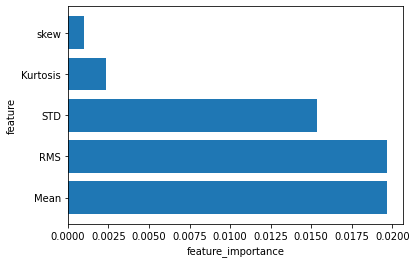

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps3['performance'] =target[3]
enc=LabelEncoder()
df_ps3['performance']=enc.fit_transform(df_ps3['performance'])
y=df_ps3['performance']
x=df_ps3.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.02434329 0.02598987 0.01239209 0.11675318 0.04751621]


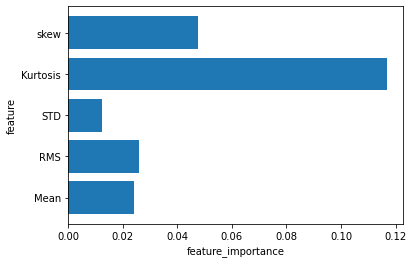

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps4['performance'] =target[3]
enc=LabelEncoder()
df_ps4['performance']=enc.fit_transform(df_ps4['performance'])
y=df_ps4['performance']
x=df_ps4.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.12692601 0.1313068  0.05177281 2.82168339 0.22809626]


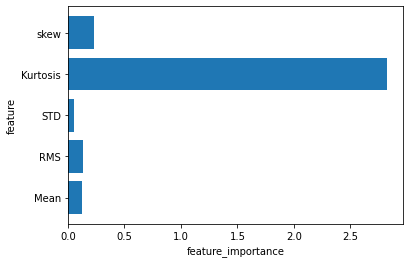

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps5['performance'] =target[3]
enc=LabelEncoder()
df_ps5['performance']=enc.fit_transform(df_ps5['performance'])
y=df_ps5['performance']
x=df_ps5.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.01184063 0.01184081 0.00058052 0.01901923 0.01639008]


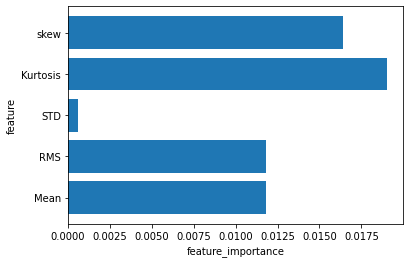

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps6['performance'] =target[3]
enc=LabelEncoder()
df_ps6['performance']=enc.fit_transform(df_ps6['performance'])
y=df_ps6['performance']
x=df_ps6.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.00791908 0.00791906 0.00047576 0.01461624 0.01551099]


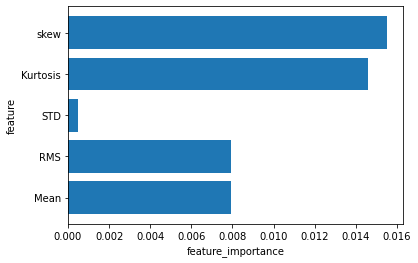

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

#accumulator pressure check with GBDTC

In [ ]:
df_final=pd.DataFrame()
df_final['PS1_f']=df_ps1['STD']
df_final['PS2_f']=df_ps2['RMS']
df_final['PS3_f']=df_ps3['Kurtosis']
df_final['PS4_f']=df_ps4['Kurtosis']
df_final['PS5_f']=df_ps5['Kurtosis']
df_final['PS6_f']=df_ps6['Skew']
df_final['performance']=target[3]

In [ ]:
enc=LabelEncoder()
df_final['performance']=enc.fit_transform(df_final['performance'])

In [ ]:
#performing train test split 80:20
y=df_final['performance']
del df_final['performance']
x=df_final
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Text(0, 0.5, 'Frequency')

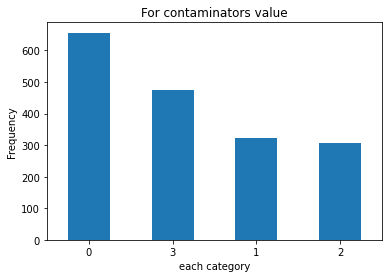

In [ ]:
#Checking whether data is balanced or not
risk_flag_sum=pd.value_counts(y_train,sort=True)
risk_flag_sum.plot(kind='bar',rot=0)
plt.title('For contaminators value')

plt.xlabel('each category')
plt.ylabel('Frequency')
#We can observe data is imbalanced from below figure

In [ ]:
#Now we are using Synthetic Minority OverSampling Technique(SMOTE) on Training data
#We use SMOTE to overcome Class Imbalance
from collections import Counter
from imblearn.combine import SMOTETomek
counter=Counter(y_train)
print('before',counter)
smtom=SMOTETomek()
X,Y=smtom.fit_resample(X_train,y_train)
counter=Counter(Y)
print('after',counter)

before Counter({0: 656, 3: 476, 1: 324, 2: 308})
after Counter({3: 633, 2: 604, 1: 603, 0: 602})


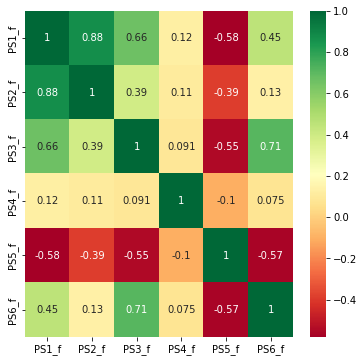

In [ ]:
#We use correlation matrix to observe relations among different features
corrmat=df_final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))
c=sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
random_grid={'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.15],'n_estimators':[50,100,200,250],'max_features':[1,3,5,7],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_depth':[1,3,5,7,10,30]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
classifier_random=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=100,n_jobs=-1,cv=5,verbose=3)
classifier_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tr

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.15],
                                        'max_depth': [1, 3, 5, 7, 10, 30],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 250]},
                   verbose=3)

In [ ]:
classifier_random.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=30, max_features=5,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=250)

In [ ]:
classifier=GradientBoostingClassifier(learning_rate=0.05, max_depth=30, max_features=5,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=250)
classifier.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=30, max_features=5,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=250)

In [ ]:
y_testpred=classifier.predict(X_test)
df_testpred=y_testpred
df_testpred=df_testpred.reshape(-1,1)
accuracy_score(y_test, y_testpred)

0.9480725623582767


#Important features to check stable condition

In [ ]:
df_ps1['performance'] =target[4]
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_ps1['performance']=enc.fit_transform(df_ps1['performance'])
y=df_ps1['performance']
x=df_ps1.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)

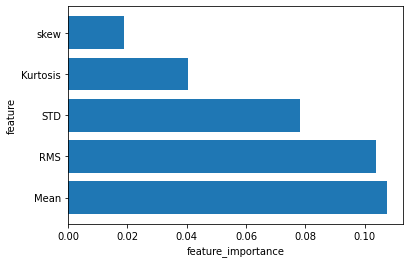

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps2['performance'] =target[4]
enc=LabelEncoder()
df_ps2['performance']=enc.fit_transform(df_ps2['performance'])
y=df_ps2['performance']
x=df_ps2.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.34046082 0.27693068 0.33844121 0.06176021 0.01782687]


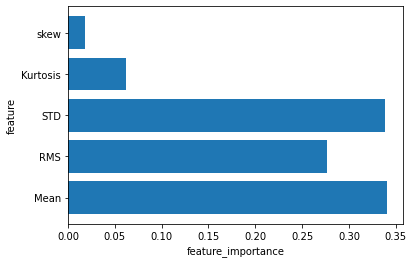

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps3['performance'] =target[4]
enc=LabelEncoder()
df_ps3['performance']=enc.fit_transform(df_ps3['performance'])
y=df_ps3['performance']
x=df_ps3.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.03050947 0.03216371 0.013375   0.14989258 0.06715563]


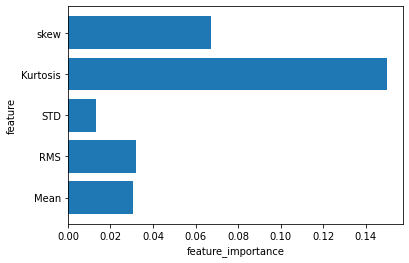

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps4['performance'] =target[4]
enc=LabelEncoder()
df_ps4['performance']=enc.fit_transform(df_ps4['performance'])
y=df_ps4['performance']
x=df_ps4.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.02946528 0.02824991 0.01112255 0.12989378 0.06636573]


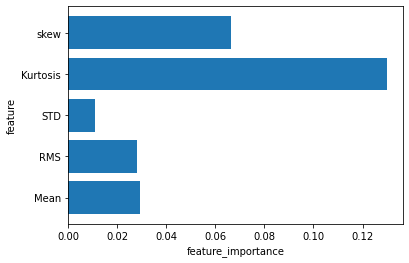

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps5['performance'] =target[4]
enc=LabelEncoder()
df_ps5['performance']=enc.fit_transform(df_ps5['performance'])
y=df_ps5['performance']
x=df_ps5.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.0179348  0.01793485 0.00041197 0.01311329 0.01045071]


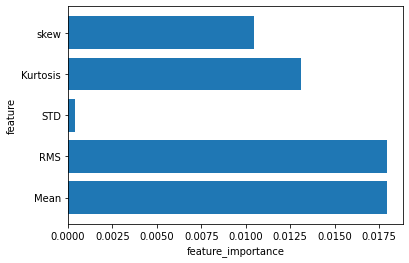

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

In [ ]:
df_ps6['performance'] =target[4]
enc=LabelEncoder()
df_ps6['performance']=enc.fit_transform(df_ps6['performance'])
y=df_ps6['performance']
x=df_ps6.drop("performance",axis='columns')
X_arr=x.to_numpy()
y_arr=y.to_numpy()
r = relief.Relief(n_features=1)
matrix= r.fit_transform(X_arr,y_arr)
print(r.w_)

[0.019491   0.01949137 0.00036361 0.01264242 0.01340234]


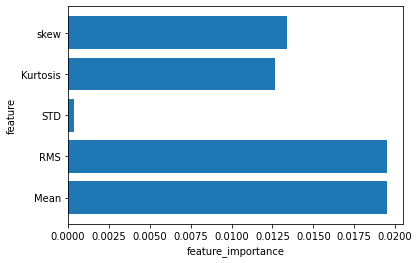

In [ ]:
x=r.w_
y=['Mean','RMS','STD','Kurtosis','skew']
plt.barh(y, x)
plt.ylabel("feature")
plt.xlabel("feature_importance")
plt.show() 

#Checking stability with GBDTC

In [ ]:
df_final=pd.DataFrame()
df_final['PS1_f']=df_ps1['Mean']
df_final['PS2_f']=df_ps2['Mean']
df_final['PS3_f']=df_ps3['Kurtosis']
df_final['PS4_f']=df_ps4['Kurtosis']
df_final['PS5_f']=df_ps5['RMS']
df_final['PS6_f']=df_ps6['RMS']
df_final['performance']=target[4]

In [ ]:
enc=LabelEncoder()
df_final['performance']=enc.fit_transform(df_final['performance'])

In [ ]:
#performing train test split 80:20
y=df_final['performance']
del df_final['performance']
x=df_final
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Text(0, 0.5, 'Frequency')

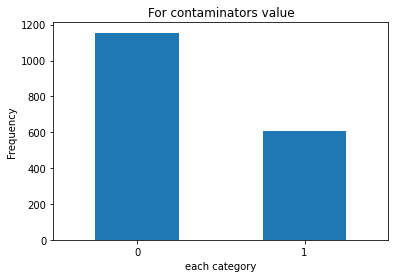

In [ ]:
#Checking whether data is balanced or not
risk_flag_sum=pd.value_counts(y_train,sort=True)
risk_flag_sum.plot(kind='bar',rot=0)
plt.title('For contaminators value')

plt.xlabel('each category')
plt.ylabel('Frequency')
#We can observe data is imbalanced from below figure

In [ ]:
#Now we are using Synthetic Minority OverSampling Technique(SMOTE) on Training data
#We use SMOTE to overcome Class Imbalance
from collections import Counter
from imblearn.combine import SMOTETomek
counter=Counter(y_train)
print('before',counter)
smtom=SMOTETomek()
X,Y=smtom.fit_resample(X_train,y_train)
counter=Counter(Y)
print('after',counter)

before Counter({0: 1155, 1: 609})
after Counter({0: 1135, 1: 1135})


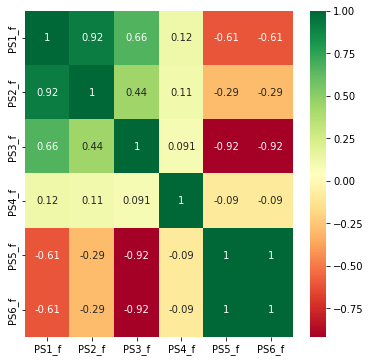

In [ ]:
#We use correlation matrix to observe relations among different features
corrmat=df_final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))
c=sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
random_grid={'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.15],'n_estimators':[50,100,200,250],'max_features':[1,3,5,7],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_depth':[1,3,5,7,10,30]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
classifier_random=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=100,n_jobs=-1,cv=5,verbose=3)
classifier_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tr

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.15],
                                        'max_depth': [1, 3, 5, 7, 10, 30],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 250]},
                   verbose=3)

In [ ]:
classifier_random.best_estimator_

GradientBoostingClassifier(learning_rate=0.15, max_depth=10, max_features=3,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=250)

In [ ]:
classifier=GradientBoostingClassifier(learning_rate=0.15, max_depth=10, max_features=3,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=250)
classifier.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=10, max_features=3,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=250)

In [ ]:
y_testpred=classifier.predict(X_test)
df_testpred=y_testpred
df_testpred=df_testpred.reshape(-1,1)
accuracy_score(y_test, y_testpred)

0.9773242630385488